In [1]:
9.73821e-07 - 9.53659e-07

2.0162000000000045e-08

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd
import bisect

mobility = 0.01766267295230362
V_T = 0.5391523609496809
g_m = 71.53382545682966


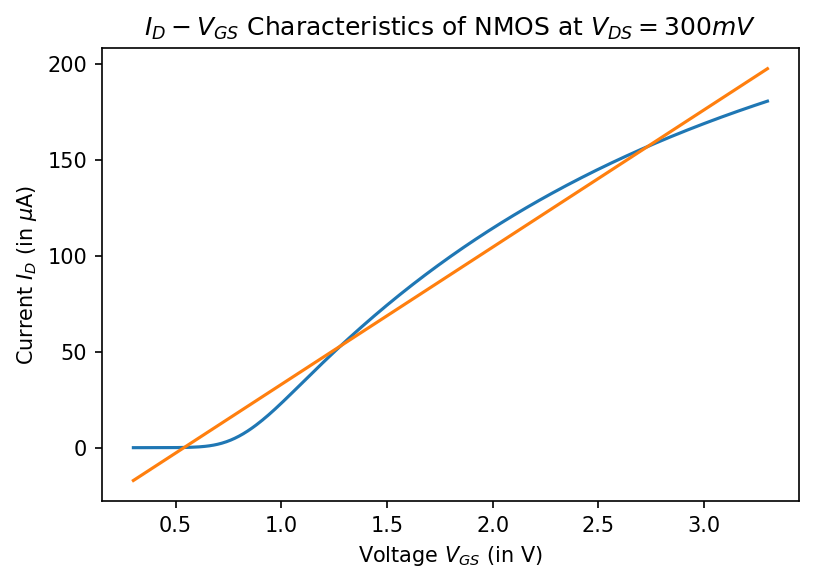

In [3]:
V_GS = np.arange(2.5, 4.5, 0.5)
data = pd.read_csv('E:\Program_Files\Spice64\EE236\Endsem\\2a.txt', header = None, skipinitialspace=True, delim_whitespace=True)
V_GS = data[0]
I_D = data[1]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in $\mu$A)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=300mV$')
# ax1.legend(V_GS)
fig1.set_dpi(150)
slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[10:], 1000000*I_D[10:])
ax1.plot(V_GS, 1000000*I_D, '-o', markersize=0.01)
ax1.plot(V_GS, slope*V_GS + y_intercept, '-o', markersize=0.01)
K = slope/0.3
Cox = 450 * 1e-9 * 1e4 
WL = 1.2 / 0.4
mobility = K/(Cox * WL)/1000000
print("mobility =", mobility)
V_T = -y_intercept/slope
print("V_T =", V_T)
g_m = slope
print("g_m =", g_m)  # in mu mhos
fig1.savefig('y1.pdf')
# mobility = 0.0123275 Am^2/(FV^2)

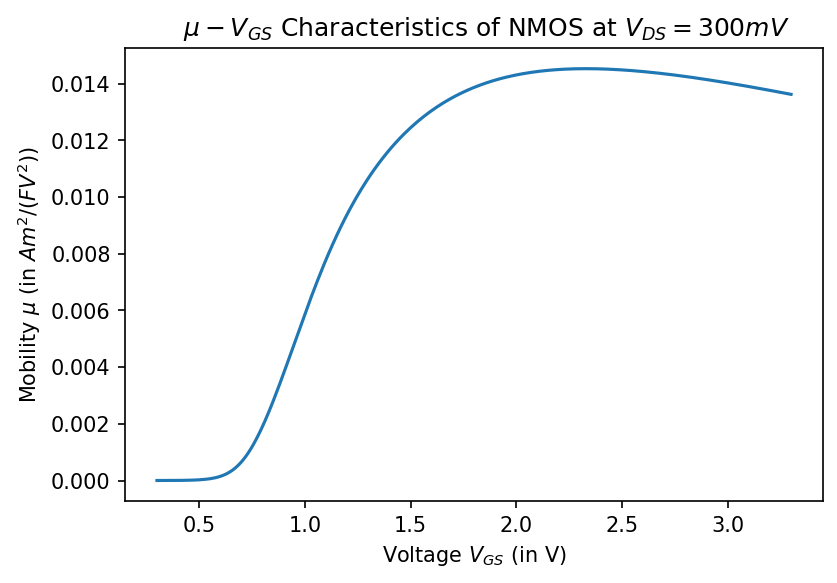

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Mobility $\mu$ (in $Am^2/(FV^2)$)')
ax1.set_title('$\quad\mu-V_{GS}$ Characteristics of NMOS at $V_{DS}=300mV$')
# ax1.legend(V_GS)
# slopes = np.zeros(len(V_GS)-1)
# for i in range(len(V_GS)-1):
#     slopes[i] = 1000000*(I_D[i+1]-I_D[i])/(V_GS[i+1]-V_GS[i])
fig1.set_dpi(150)
# K = slopesy/0.3
Cox = 450 * 1e-9 * 1e4 
WL = 1.2 / 0.4
V_DS = 0.3
V_T = 26e-3
mobility = I_D/(Cox * WL * (V_GS-V_T)*V_DS)
ax1.plot(V_GS, mobility, '-o', markersize=0.01)
fig1.savefig('y2.pdf')

41.326124249702865
48.70882175407157
56.56533984425148


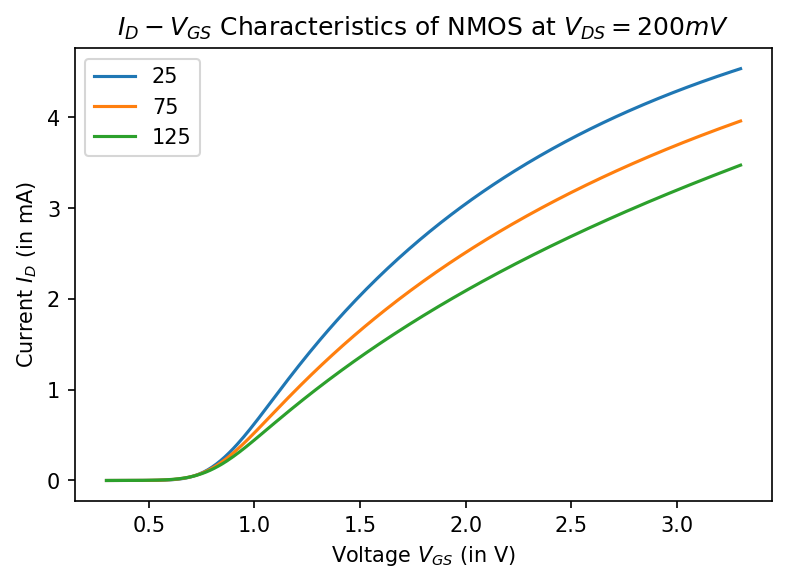

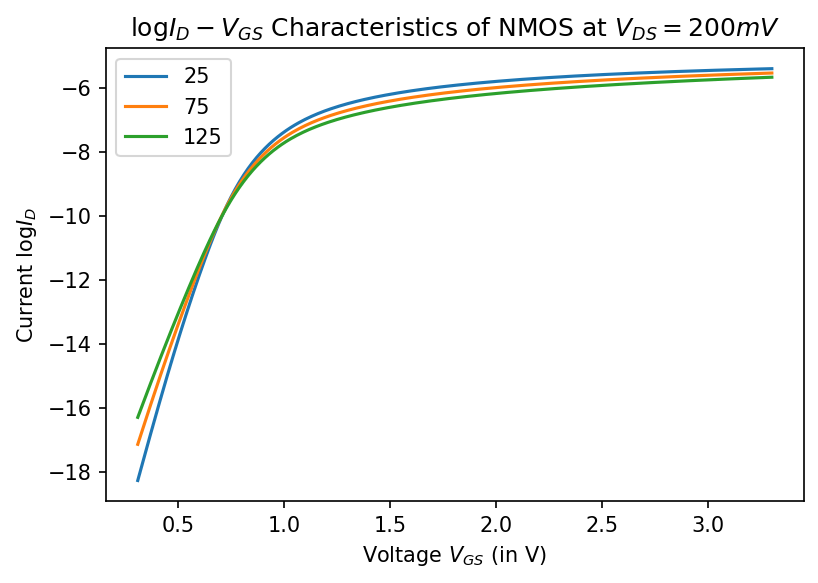

In [5]:
V_GS = []
I_D = []
temp = [25,75,125]
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')
fig1.set_dpi(150)

for i in range(len(temp)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Endsem\\2c' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_GS.append(data[0])
    I_D.append(data[1])
    ax1.plot(V_GS[i], 1000*I_D[i], '-o', markersize=0.01)
    
# p = np.poly1d(np.polyfit(V_GS, I_D, deg = 5))
# ax1.plot(V_GS, [p(i) for i in V_GS], '-o', markersize=0.01)
# ax1.plot(V_GS, I_D, 'o', markersize=3)
# V_T = -y_intercept/slope
# print("V_T =", V_T)
# g_m = slope
# print("g_m =", g_m)  # in m mhos
# fig1.savefig('112.pdf')

# d = np.poly1d.deriv(p)
# max_g_m = -np.inf
# max_V_GS = 0
# for i in V_GS:
#     s = d(i)
#     if s > max_g_m:
#         max_g_m = s
#         max_V_GS = i
        
# print(max_V_GS, max_g_m)

fig2, ax2 = plt.subplots()
fig2.set_dpi(150)
for i in range(len(temp)):
    slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[i][2:], np.log(I_D[i][2:]))
    ax2.plot(V_GS[i][1:], np.log(I_D[i][1:]), '-o', markersize=0.01)
    SS = 1/((np.log(I_D[i][2])-np.log(I_D[i][1]))/(1000*(V_GS[i][2]-V_GS[i][1])))
    print(SS)    
ax2.set_xlabel('Voltage $V_{GS}$ (in V)')
ax2.set_ylabel('Current $\log{I_D}$')
ax2.set_title('$\log{I_D}-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')
ax1.legend(temp)
ax2.legend(temp)
fig1.savefig('x1.pdf')
fig2.savefig('x2.pdf')

V_T = 4.699009814974704
g_m = 2.481110221357284
41.326124249702865
V_T = 4.927494531345755
g_m = 2.32694562875144
48.70882175407157


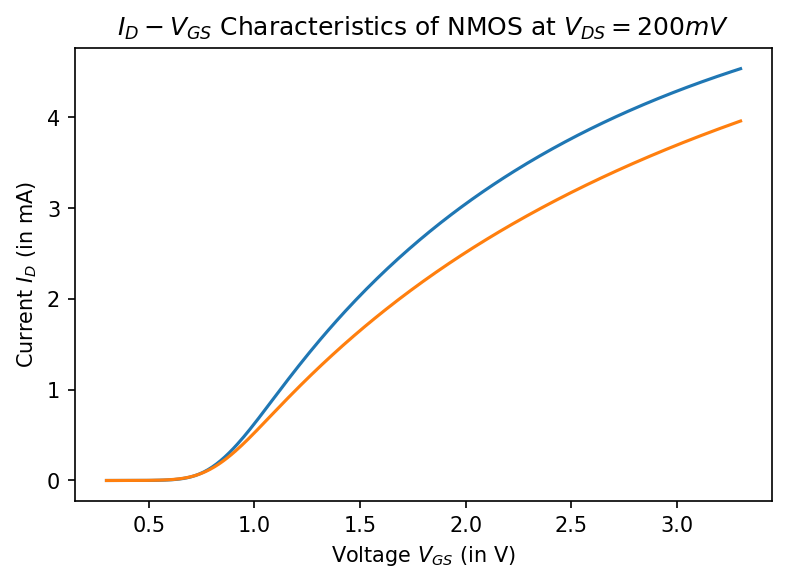

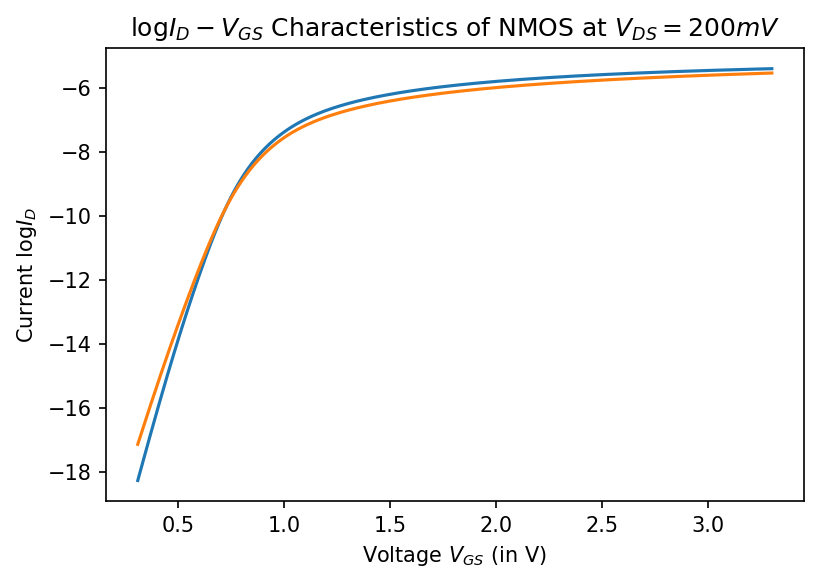

In [7]:
V_GS = []
I_D = []
temp = [25,25]
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')
fig1.set_dpi(150)

for i in range(len(temp)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Endsem\\2c' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_GS.append(data[0])
    I_D.append(data[1])
    ax1.plot(V_GS[i], 1000*I_D[i], '-o', markersize=0.01)
    
# fig1.savefig('112.pdf')

# d = np.poly1d.deriv(p)
# max_g_m = -np.inf
# max_V_GS = 0
# for i in V_GS:
#     s = d(i)
#     if s > max_g_m:
#         max_g_m = s
#         max_V_GS = i
        
# print(max_V_GS, max_g_m)

fig2, ax2 = plt.subplots()
fig2.set_dpi(150)
for i in range(len(temp)):
    slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[i][2:], np.log(I_D[i][2:]))
    ax2.plot(V_GS[i][1:], np.log(I_D[i][1:]), '-o', markersize=0.01)
    SS = 1/((np.log(I_D[i][2])-np.log(I_D[i][1]))/(1000*(V_GS[i][2]-V_GS[i][1])))
    
    p = np.poly1d(np.polyfit(V_GS[i], I_D[i], deg = 5))
    # ax1.plot(V_GS, [p(i) for i in V_GS], '-o', markersize=0.01)
    # ax1.plot(V_GS, I_D, 'o', markersize=3)
    V_T = -y_intercept/slope
    print("V_T =", V_T)
    g_m = slope
    print("g_m =", g_m)  # in m mhos
    print(SS)    
ax2.set_xlabel('Voltage $V_{GS}$ (in V)')
ax2.set_ylabel('Current $\log{I_D}$')
ax2.set_title('$\log{I_D}-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')
# ax1.legend(temp)
# ax2.legend(temp)
fig1.savefig('x1.pdf')
fig2.savefig('x2.pdf')